In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/home/hks/ml/Predictions/cat-vs-dog-image-classification-making-prediction/dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Data preprocessing for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/home/hks/ml/Predictions/cat-vs-dog-image-classification-making-prediction/dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

In [ ]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
weights_path = '/home/hks/ml/Predictions/cnn_weights.weights.h5'

In [ ]:
# Check if weights file exists, if not, train and save weights
if not os.path.exists(weights_path):
    # Training the CNN and saving history
    history = cnn.fit(x=training_set, validation_data=test_set, epochs=50)
    # Save weights after training
    cnn.save_weights(weights_path)  # Corrected line
else:
    # Load weights if they exist
    cnn.load_weights(weights_path)

In [ ]:
if 'history' in locals():
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
test_image_dir = '/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/test_set'
categories = os.listdir(test_image_dir)
selected_category = random.choice(categories)
selected_image = random.choice(os.listdir(os.path.join(test_image_dir, selected_category)))
selected_image_path = os.path.join(test_image_dir, selected_category, selected_image)

In [12]:
test_image = image.load_img(selected_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.0

In [13]:
result = cnn.predict(test_image_array)
confidence = result[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [14]:
if confidence > 0.5:
    prediction = 'dog'
    confidence_percentage = confidence * 100
else:
    prediction = 'cat'
    confidence_percentage = (1 - confidence) * 100

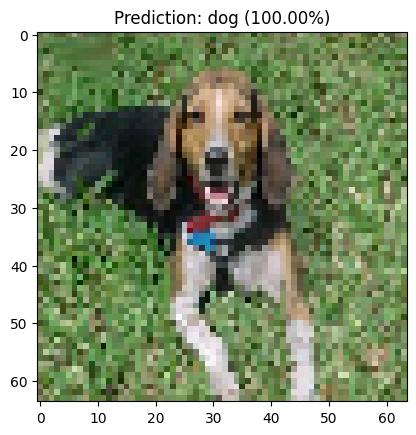

In [16]:
plt.imshow(test_image)
plt.title(f'Prediction: {prediction} ({confidence_percentage:.2f}%)')
plt.axis('on')
plt.show()